In [43]:
import numpy as np
from scipy.fftpack import rfft, rfftfreq
from scipy.signal import find_peaks
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

In [55]:
def signal_ISB(_f, _A, _phi,_fs, _n):
    f = _f # frecuencia de la señal: 100 hz
    T = 1/f # periodo 
    Fs = _fs #20*f # frecuencia de nyquest
    Ts = 1/Fs # periodo de muestreo
    #n = np.arange(0,4*int(T/Ts))
    #n = np.arange(10000)
    n = _n
    t = n*Ts
    w = 2*np.pi*f
    A = _A
    phi = _phi
    return t, A*np.sin(w*t+phi)

def fft_ISB(sig, ts):
    X = rfft(sig)
    vfreqs = rfftfreq(sig.size, ts)
    
    return (vfreqs, np.abs(X))

def find_peaks_ISB(X, vfreqs, Ts, ax, plot=True, height=100,dd=10):
    peaks, properties = find_peaks(X, height=height, distance=dd)
    
    if plot==True:
        #vfreqs, Xm = fft_ISB(x,Ts)
        ax.stem(vfreqs, X)

        ax.plot(vfreqs[peaks],properties["peak_heights"],"x")
        for p,i in enumerate(vfreqs[peaks]):
            ax.text(i,properties["peak_heights"][p], f"{np.round(vfreqs[peaks][p],2)} hz")
    
    return peaks, properties

def filter_fir_ISB(b,x):
    xf = lfilter(b,1,x)
    
    return xf


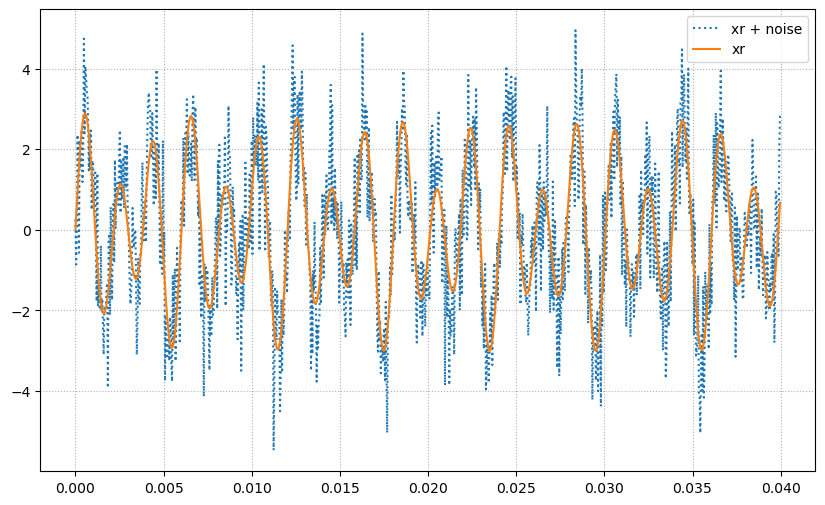

In [83]:
f1 = 330
f2 = 500

Fs = 50*f2
Ts = 1/Fs
n = np.arange(0,1000)

t, x1 = signal_ISB(f1,1,0,Fs,n)
t, x2 = signal_ISB(f2,2,0,Fs,n)

_xr = x1+x2
xr = _xr+np.random.randn(n.size)

plt.figure(figsize=(10,6))
plt.plot(t,xr, ls=":", label="xr + noise")
plt.plot(t,_xr,label="xr")
plt.grid(ls=":")
plt.legend()
plt.show()

In [84]:
Fs

25000

(array([26, 40], dtype=int64),
 {'peak_heights': array([376.03557499, 987.63602967])})

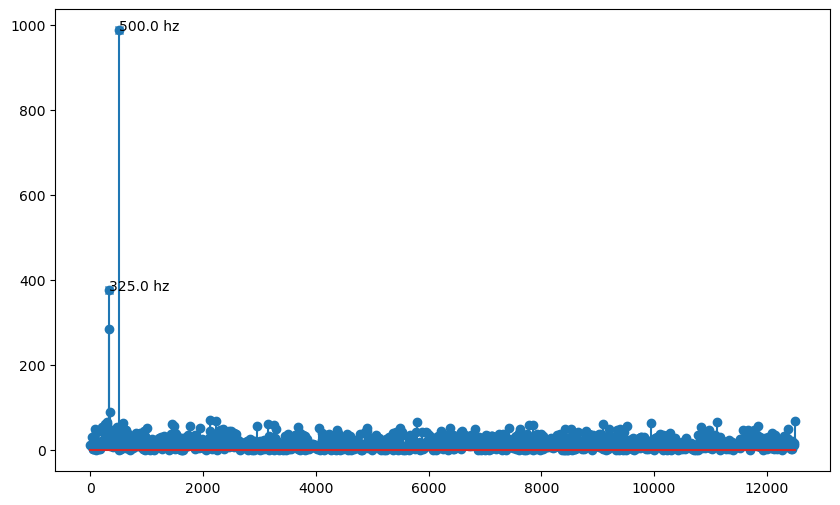

In [85]:
plt.figure(figsize=(10,6))
ax = plt.subplot()

vfreqs, Xm = fft_ISB(xr,Ts)
find_peaks_ISB(Xm, vfreqs, Ts, ax, plot=True)

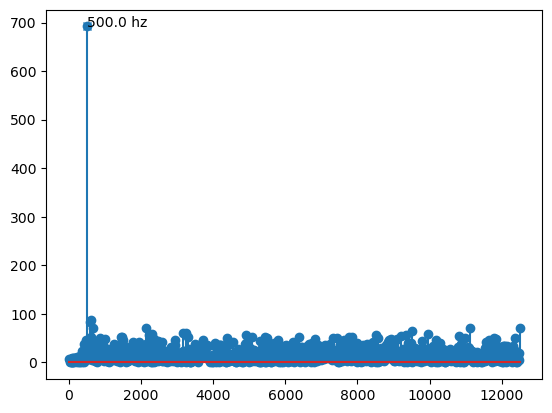

In [97]:
b = 0.0037292295480032952,0.00437212131707326,0.004984772153699304,0.0055584457600505385,0.006084495364688293,0.0065544534064095605,0.006960121061908438,0.007293656687564001,0.007547662246189948,0.0077152668000459975,0.007790206171720978,0.007766897904577021,0.007640510693979398,0.007407027509235654,0.007063301683513111,0.006607105314507114,0.006037169391585331,0.005353215144865145,0.004555976197334657,0.0036472111918671294,0.002629706659837691,0.0015072699960689462,0.00028471250495554136,-0.0010321774161651121,-0.002436670789141078,-0.003921143995238613,-0.0054771337781110985,-0.007095400849340206,-0.008766001545814372,-0.010478366902822715,-0.012221388427492982,-0.013983509784912352,-0.01575282354479324,-0.01751717208053122,-0.019264251665632528,-0.020981718775240757,-0.022657297573340073,-0.02427888754943518,-0.025834670262354656,-0.027313214153352073,-0.028703576405911566,-0.029995400855433795,-0.031179010988076964,-0.03224549711405555,-0.033186796856251304,-0.03399576815944481,-0.03466625409822406,-0.035193138841874506,-0.03557239422151474,-0.03580111643747067,0.9607211291923791,-0.03580111643747067,-0.03557239422151474,-0.035193138841874506,-0.03466625409822406,-0.03399576815944481,-0.033186796856251304,-0.03224549711405555,-0.031179010988076964,-0.029995400855433795,-0.028703576405911566,-0.027313214153352073,-0.025834670262354656,-0.02427888754943518,-0.022657297573340073,-0.020981718775240757,-0.019264251665632528,-0.01751717208053122,-0.01575282354479324,-0.013983509784912352,-0.012221388427492982,-0.010478366902822715,-0.008766001545814372,-0.007095400849340206,-0.0054771337781110985,-0.003921143995238613,-0.002436670789141078,-0.0010321774161651121,0.00028471250495554136,0.0015072699960689462,0.002629706659837691,0.0036472111918671294,0.004555976197334657,0.005353215144865145,0.006037169391585331,0.006607105314507114,0.007063301683513111,0.007407027509235654,0.007640510693979398,0.007766897904577021,0.007790206171720978,0.0077152668000459975,0.007547662246189948,0.007293656687564001,0.006960121061908438,0.0065544534064095605,0.006084495364688293,0.0055584457600505385,0.004984772153699304,0.00437212131707326,0.0037292295480032952

xf = filter_fir_ISB(b,xr)
vfreqs, X = fft_ISB(xf, Ts)

ax = plt.subplot()
find_peaks_ISB(X, vfreqs, Ts, ax, plot=True, height=80,dd=10)
plt.show()

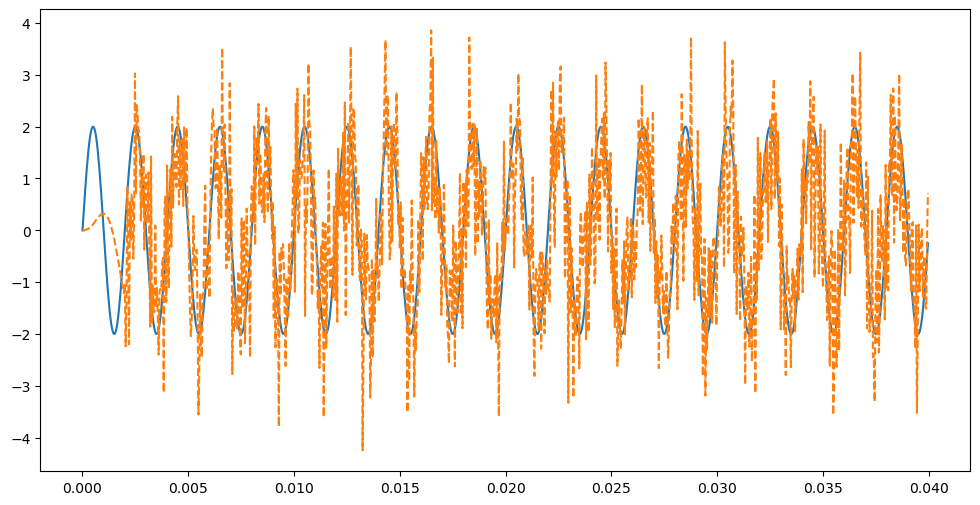

In [102]:
plt.figure(figsize=(12,6))

plt.plot(t, x2)
plt.plot(t, xf, ls="--")

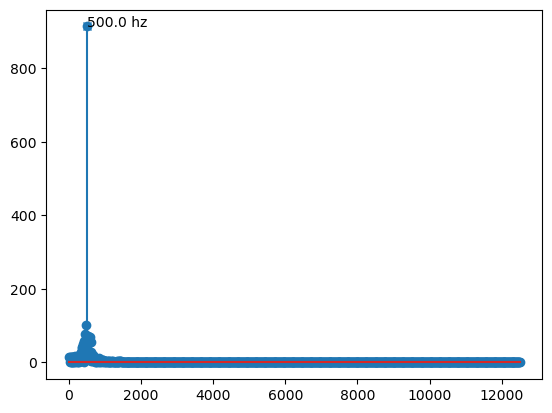

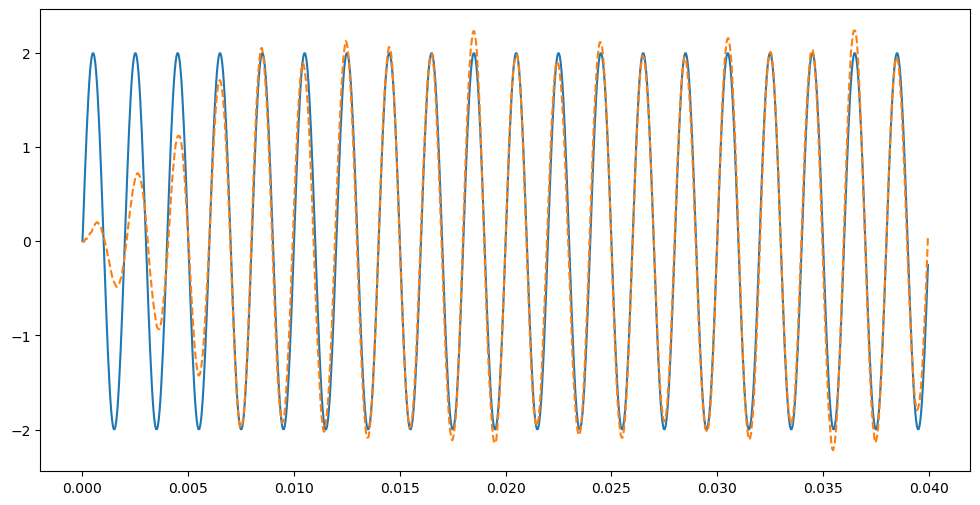

In [106]:
b = 0.008273871119181441,0.00819110555426586,0.00797656213135415,0.007632180443028857,0.007162032388432848,0.006572278909820454,0.005871091761104156,0.00506854124969368,0.004176451472353343,0.003208225125086783,0.002178640496529755,0.001103623744743492,-4.144456943726288e-18,-0.001114772776784012,-0.0022228829259080983,-0.0033064527012814484,-0.00434782967147865,-0.005329877112772096,-0.006236258572339543,-0.007051711835501087,-0.007762307666975057,-0.008355688911095002,-0.008821285826687727,-0.009150503894553082,-0.009336880763643522,-0.00937620948939008,-0.009266625756384508,-0.009008657359101077,-0.008605234829038591,-0.008061662734466603,-0.007385551829294947,-0.006586712879592403,-0.005677013639000916,-0.004670201066852657,-0.003581691474597175,-0.0024283318370362655,-0.0012281360053247629,-1.7761958330255522e-18,0.0012365990633281746,0.0024619155622581227,0.003656254394863988,0.004800291232662854,0.0058753887338065525,0.006863903486321085,0.007749478573899907,0.008517316865253546,0.009154430419299142,0.009649861768100457,0.009994873281661104,0.010183101326398082,0.01021067249420905,0.010076279792319124,0.00978121733552122,0.009329372761289012,0.008727177283314487,0.007983513998750498,0.007109585757142006,0.006118744573095367,0.005026285208815183,0.003849206155841931,0.002605941797404801,0.0013160700243330845,-3.5523916660511044e-18,-0.0013213548840158946,-0.002626913556039318,-0.0038957678339255845,-0.005107521447562327,-0.0062426219513075495,-0.007282680061445197,-0.008210771142736056,-0.009011713845251963,-0.009672321253552985,-0.010181620349132354,-0.010531036096819067,-0.010714537038194107,-0.010728739900668778,-0.01057297139940728,-0.010249286109715398,-0.009762440008269329,-0.009119820010663372,-0.008331330558083478,-0.0074092390153769365,-0.006367982324537952,-0.005223938000256526,-0.003995163146910456,-0.0027011057092601177,-0.0013622926331604438,-4.736522221401472e-18,0.0013640894972508245,0.0027082361527302093,0.004010994213802452,0.005251558477912603,0.006410100848987591,0.00746809134157906,0.008408598271654957,0.009216562710892337,0.009879042700949067,0.010385423218574875,0.010727588443382313,0.010900053498342856,0.010900053498342856,0.010727588443382313,0.010385423218574875,0.009879042700949067,0.009216562710892337,0.008408598271654957,0.00746809134157906,0.006410100848987591,0.005251558477912603,0.004010994213802452,0.0027082361527302093,0.0013640894972508245,-4.736522221401472e-18,-0.0013622926331604438,-0.0027011057092601177,-0.003995163146910456,-0.005223938000256526,-0.006367982324537952,-0.0074092390153769365,-0.008331330558083478,-0.009119820010663372,-0.009762440008269329,-0.010249286109715398,-0.01057297139940728,-0.010728739900668778,-0.010714537038194107,-0.010531036096819067,-0.010181620349132354,-0.009672321253552985,-0.009011713845251963,-0.008210771142736056,-0.007282680061445197,-0.0062426219513075495,-0.005107521447562327,-0.0038957678339255845,-0.002626913556039318,-0.0013213548840158946,-3.5523916660511044e-18,0.0013160700243330845,0.002605941797404801,0.003849206155841931,0.005026285208815183,0.006118744573095367,0.007109585757142006,0.007983513998750498,0.008727177283314487,0.009329372761289012,0.00978121733552122,0.010076279792319124,0.01021067249420905,0.010183101326398082,0.009994873281661104,0.009649861768100457,0.009154430419299142,0.008517316865253546,0.007749478573899907,0.006863903486321085,0.0058753887338065525,0.004800291232662854,0.003656254394863988,0.0024619155622581227,0.0012365990633281746,-1.7761958330255522e-18,-0.0012281360053247629,-0.0024283318370362655,-0.003581691474597175,-0.004670201066852657,-0.005677013639000916,-0.006586712879592403,-0.007385551829294947,-0.008061662734466603,-0.008605234829038591,-0.009008657359101077,-0.009266625756384508,-0.00937620948939008,-0.009336880763643522,-0.009150503894553082,-0.008821285826687727,-0.008355688911095002,-0.007762307666975057,-0.007051711835501087,-0.006236258572339543,-0.005329877112772096,-0.00434782967147865,-0.0033064527012814484,-0.0022228829259080983,-0.001114772776784012,-4.144456943726288e-18,0.001103623744743492,0.002178640496529755,0.003208225125086783,0.004176451472353343,0.00506854124969368,0.005871091761104156,0.006572278909820454,0.007162032388432848,0.007632180443028857,0.00797656213135415,0.00819110555426586,0.008273871119181441

xf = filter_fir_ISB(b,xr)
vfreqs, X = fft_ISB(xf, Ts)

ax = plt.subplot()
find_peaks_ISB(X, vfreqs, Ts, ax, plot=True, height=80,dd=10)
plt.show()

plt.figure(figsize=(12,6))

plt.plot(t, x2)
plt.plot(t, xf, ls="--")